In [1]:
import pandas as pd

1. drinks.csv파일 로드
2. 결측치 확인
3. continent 컬럼에 결측치 존재 --> 결측치는 'OT'변경
4. continent 별 spirit_saving 컬럼의 평균, 최소, 최대 합을 출력 
5. 이 데이터를 바형 그래프 출력
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지

In [2]:
drinks = pd.read_csv("../csv/drinks.csv")

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [5]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [7]:
drinks["continent"] = drinks["continent"].fillna("OT")

#case 2
#drinks = drinks.fillna("OT")

In [8]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [41]:
#drinks.groupby("continent").sum()["spirit_servings"]
result = drinks.groupby("continent").agg(["mean",'sum','min','max'])['spirit_servings']

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_8261/3411541440.py:2: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = drinks.groupby("continent").agg(["mean",'sum','min','max'])['spirit_servings']


In [44]:
#시각화 바 그래프로 표시
#plt.bar(x,y)
# x -> 그룹화 기준 continent

mean = result["mean"]
sum = result["sum"]
max = result["max"]
min = result["min"]

x = result.index

In [43]:
import matplotlib.pyplot as plt

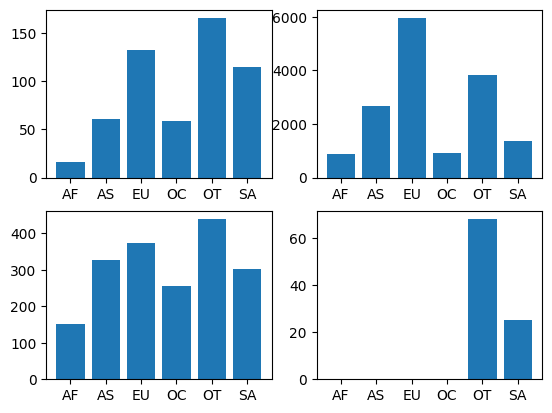

In [47]:
# subplot(행의 수, 열의 수 위치)
# 4개의 그래프 행의 수 +열의 수 = 4

plt.subplot(2,2,1)
plt.bar(x,mean)
plt.subplot(2,2,2)
plt.bar(x,sum)
plt.subplot(2,2,3)
plt.bar(x,max)
plt.subplot(2,2,4)
plt.bar(x,min)

plt.show()

In [48]:
## 전체 데이터의 술 소비량의 평균
total_mean = drinks["total_litres_of_pure_alcohol"].mean()
total_mean

4.717098445595855

In [51]:
# 대륙별 술 소비량의 평균
mean_continent = drinks.groupby("continent").mean(["total_litters_of_pure_alcohol"])
mean_continent

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
OT,145.434783,165.739130,24.521739,5.995652
SA,175.083333,114.750000,62.416667,6.308333


In [52]:
import numpy as np

In [53]:
cnt = len(x)
cnt

6

In [54]:
index = np.arange(cnt)
index

array([0, 1, 2, 3, 4, 5])

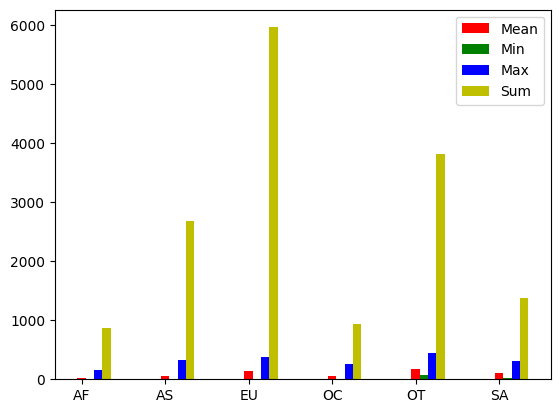

In [55]:
bar_width = 0.1

plt.bar(index, mean, bar_width, color='r', label="Mean")
plt.bar(index+bar_width, min, bar_width, color='g', label="Min")
plt.bar(index+bar_width*2, max, bar_width, color='b', label="Max")
plt.bar(index+bar_width*3, sum, bar_width,color='y', label="Sum")

plt.xticks(index, x)
plt.legend()

plt.show()